In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [70]:
# データの読み込み
df = pd.read_csv('./spam.csv', encoding='latin-1')

# 無駄な列を削除
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# 名前の変更
df.rename(columns={"v1":"label", "v2":"text"}, inplace=True)

In [201]:
# 先頭10件の要素の中身を確認
df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [222]:
# データを訓練用とテスト用に8:2で分割
X = pd.DataFrame(df['text'])
Y = pd.DataFrame(df['label'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=10)

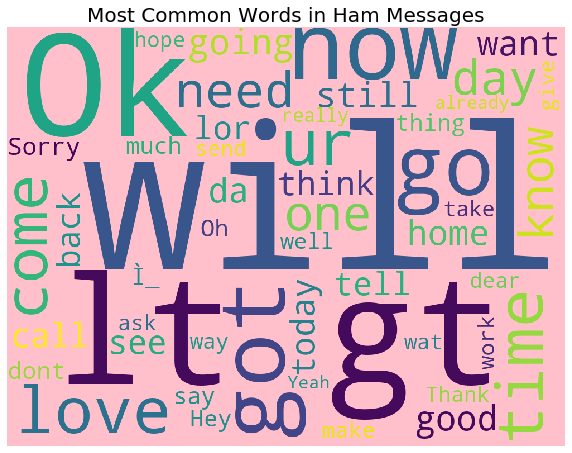

In [233]:
#spamでないデータに多く現れる文字
ham = ' '.join(text for text in df['text'][df['label'] == 'ham'])

wordcloud = WordCloud(background_color = 'pink', max_words = 50, height = 750, width = 1000).generate(ham)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in Ham Messages', fontsize = 20)
plt.imshow(wordcloud)

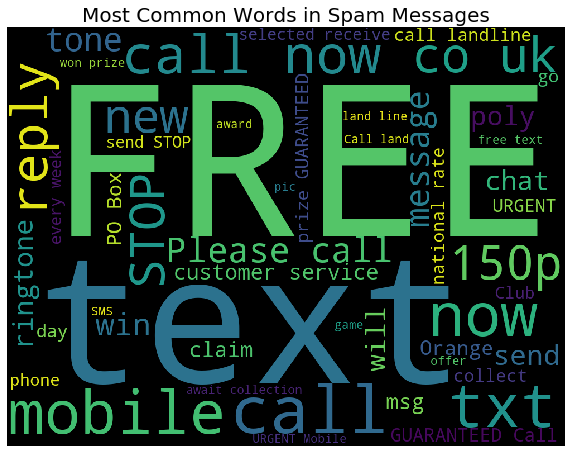

In [237]:
spam = ' '.join(text for text in df['text'][df['label'] == 'spam'])

wordcloud = WordCloud(background_color = 'black', max_words = 50, height = 750, width = 1000).generate(spam)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in Spam Messages', fontsize = 20)
plt.imshow(wordcloud)

In [221]:
# 単語の出現回数を取得(出現回数が3以下のものを削除)
vec_count = CountVectorizer(min_df=3)
vec_count.fit(X_train['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [103]:
# 単語が何種類あったか
print('word size: ', len(vec_count.vocabulary_))

word size:  2604


In [104]:
# 先頭5件の単語
print('word content: ', dict(list(vec_count.vocabulary_.items())[0:5]))

word content:  {'yes': 2580, 'they': 2249, 'replied': 1866, 'my': 1536, 'mail': 1397}


In [105]:
# データをベクトル化
X_train_vec = vec_count.transform(X_train['text'])
X_test_vec = vec_count.transform(X_test['text'])

In [106]:
# 先頭5件のベクトル化したデータ
pd.DataFrame(X_train_vec.toarray()[0:5], columns=vec_count.get_feature_names())

,00,000,02,0207,03,04,05,06,07xxxxxxxxx,0800,...,yr,yrs,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# ロジスティック回帰
model = LogisticRegression(solver='newton-cg')
model.fit(X_train_vec, Y_train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
# 実行
prediction = dict()
prediction["Logistic"] = model.predict(X_test_vec)

In [146]:
# 訓練用とテスト用データの正解率
print('Train accuracy: %.5f' % model.score(X_train_vec, Y_train))
print('Test accuracy: %.5f' % model.score(X_test_vec, Y_test))

Train accuracy: 0.99501
Test accuracy: 0.98746


In [197]:
# 予測テキストデータ作成
data = np.array(['Thank you so much for providing us with such a great opportunity.', 
                 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP'])
df_data = pd.DataFrame(data, columns=['text'])

In [198]:
# 予測テキストデータをベクトル化
input_vec = vec_count.transform(df_data['text'])

In [199]:
# ベクトル化データ表示
pd.DataFrame(input_vec.toarray(), columns=vec_count.get_feature_names())

,00,000,02,0207,03,04,05,06,07xxxxxxxxx,0800,...,yr,yrs,yummy,yun,yup,zed,ì_,ìï,û_,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
model.predict(input_vec)

array(['ham', 'spam'], dtype=object)